# Лабораторная работа №2
## Выполнил : Пелагеев Даниил Иванович Б9122-01.03.02мкт
### Какие-то алмазы... Это кто?

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
# Загрузка датасета Diamonds
diamonds = sns.load_dataset('diamonds')

# Просмотр первых пяти строк
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [71]:
# Информация о наборе данных
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [72]:
# Проверка на пропущенные значения
missing_values = diamonds.isnull().sum()
print("Пропущенные значения:\n")
missing_values

Пропущенные значения:



carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [73]:
# Сводная статистика количественных признаков
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


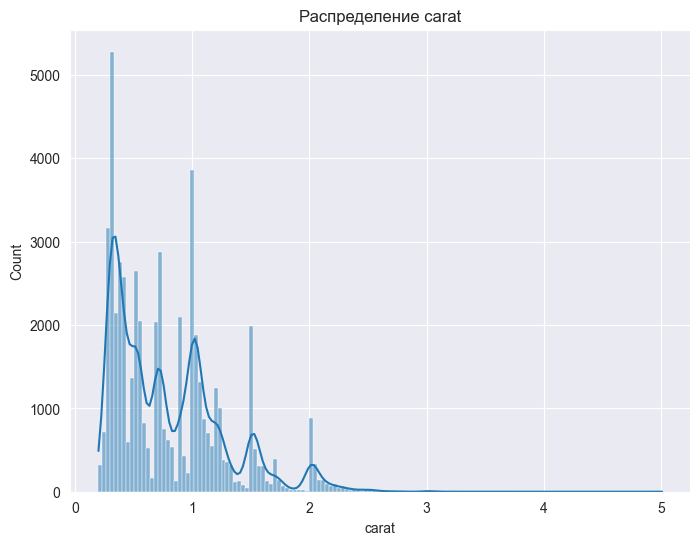

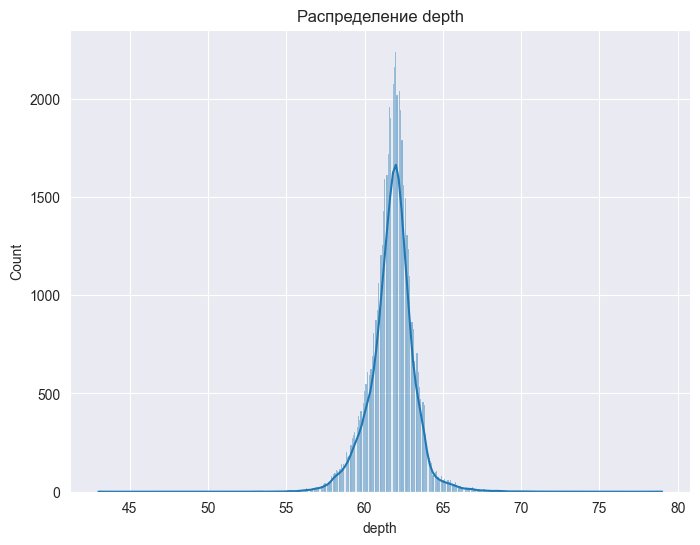

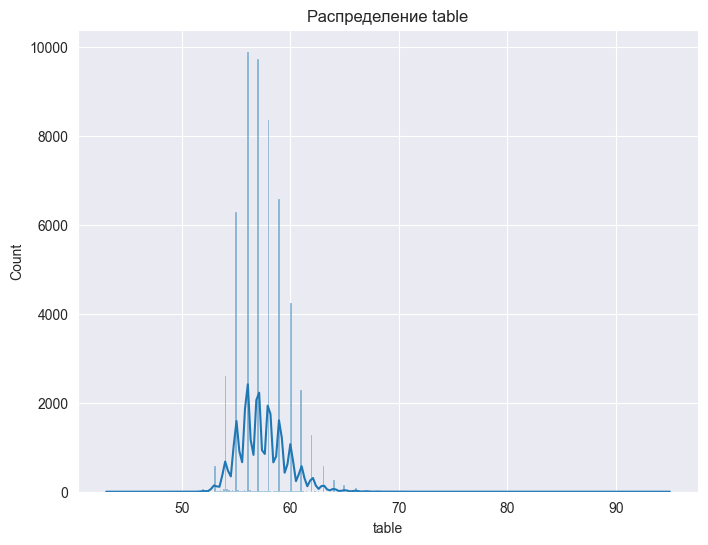

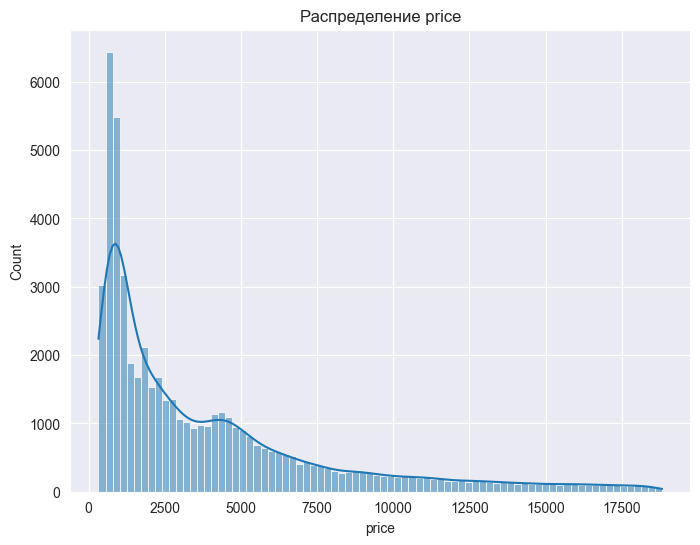

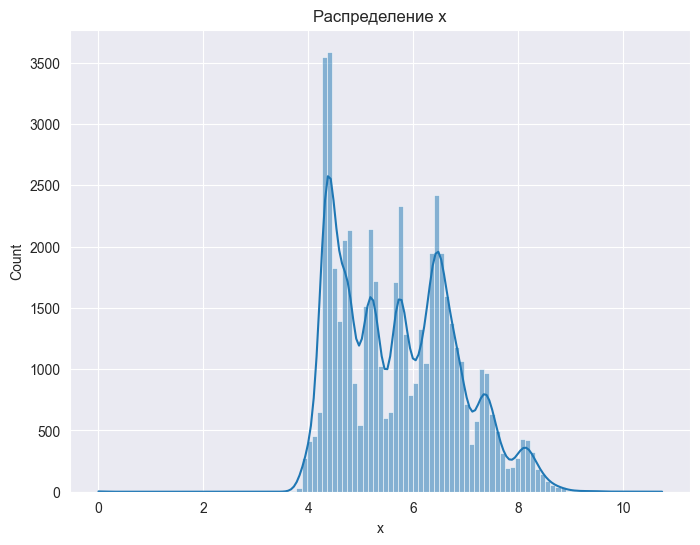

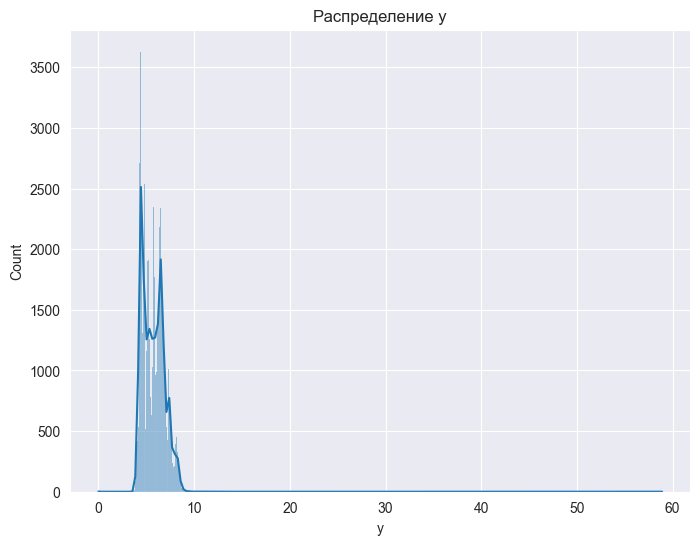

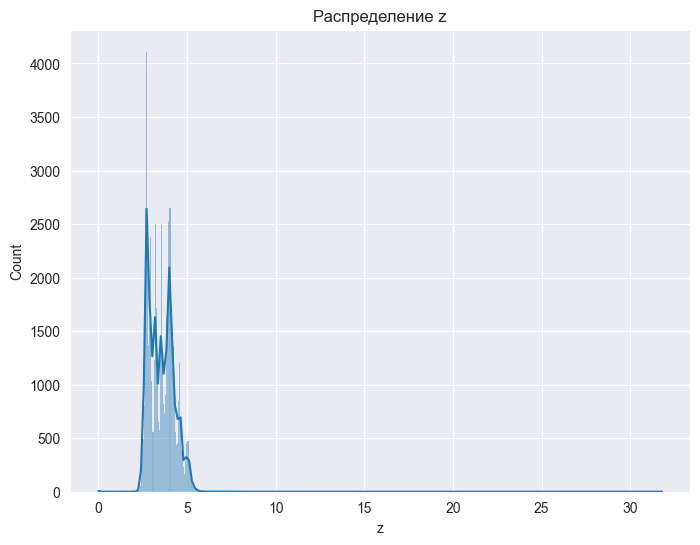

In [74]:
# Список количественных признаков
numeric_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Построение гистограмм
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(diamonds[feature], kde=True)
    plt.title(f'Распределение {feature}')
    plt.show()

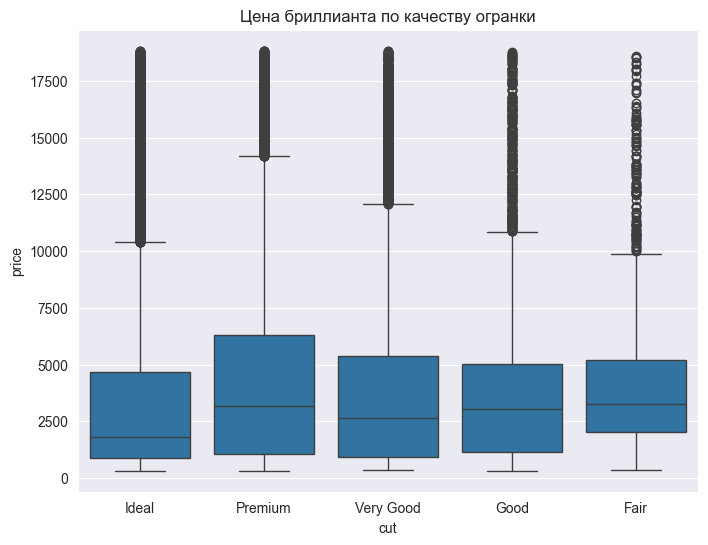

In [75]:
# Цена бриллианта по качеству огранки
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Цена бриллианта по качеству огранки')
plt.show()


Цена бриллианта увеличивается с улучшением качества огранки

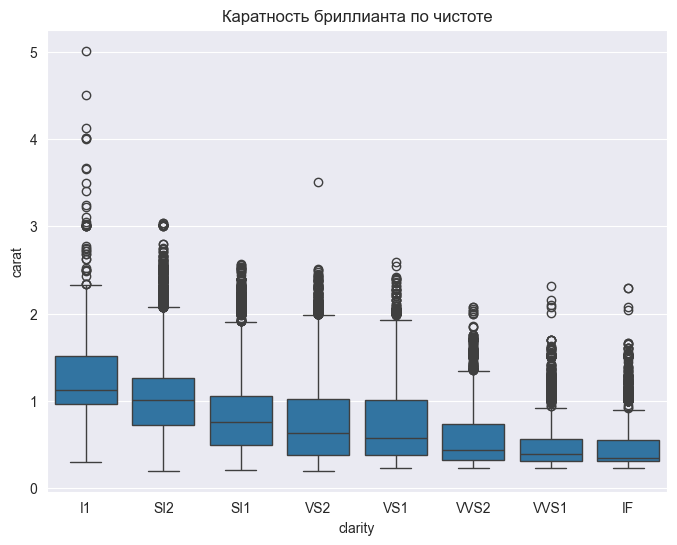

In [76]:
# Каратность бриллианта по чистоте
plt.figure(figsize=(8, 6))
sns.boxplot(x='clarity', y='carat', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title('Каратность бриллианта по чистоте')
plt.show()


Чем меньше чистота, тем выше кратность

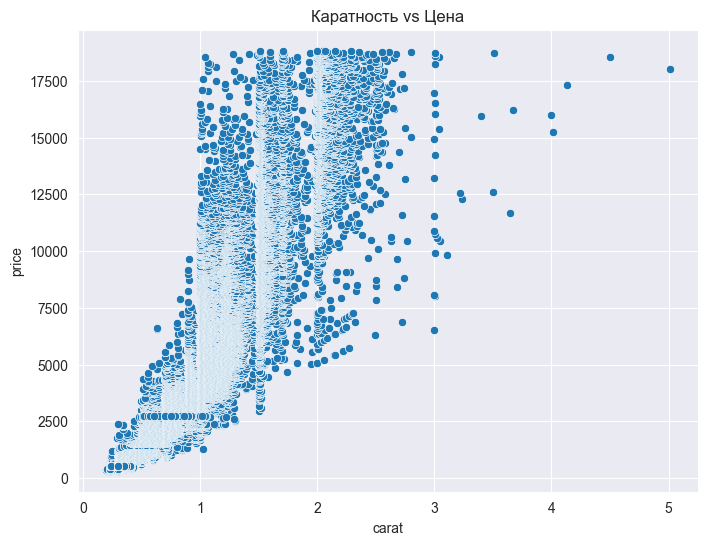

In [77]:
# Каратность vs Цена
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Каратность vs Цена')
plt.show()


Чем выше каратность, тем выше цена... Вау, я удивлен

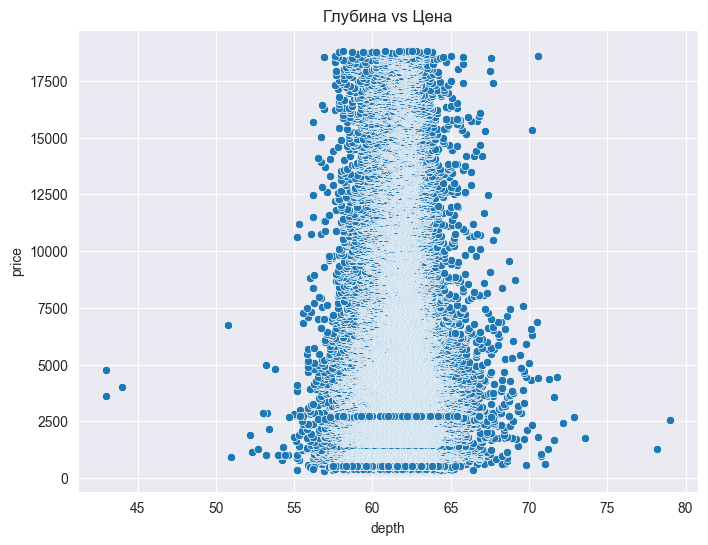

In [78]:
# Глубина vs Цена
plt.figure(figsize=(8, 6))
sns.scatterplot(x='depth', y='price', data=diamonds)
plt.title('Глубина vs Цена')
plt.show()


Глубина не влияет сильно

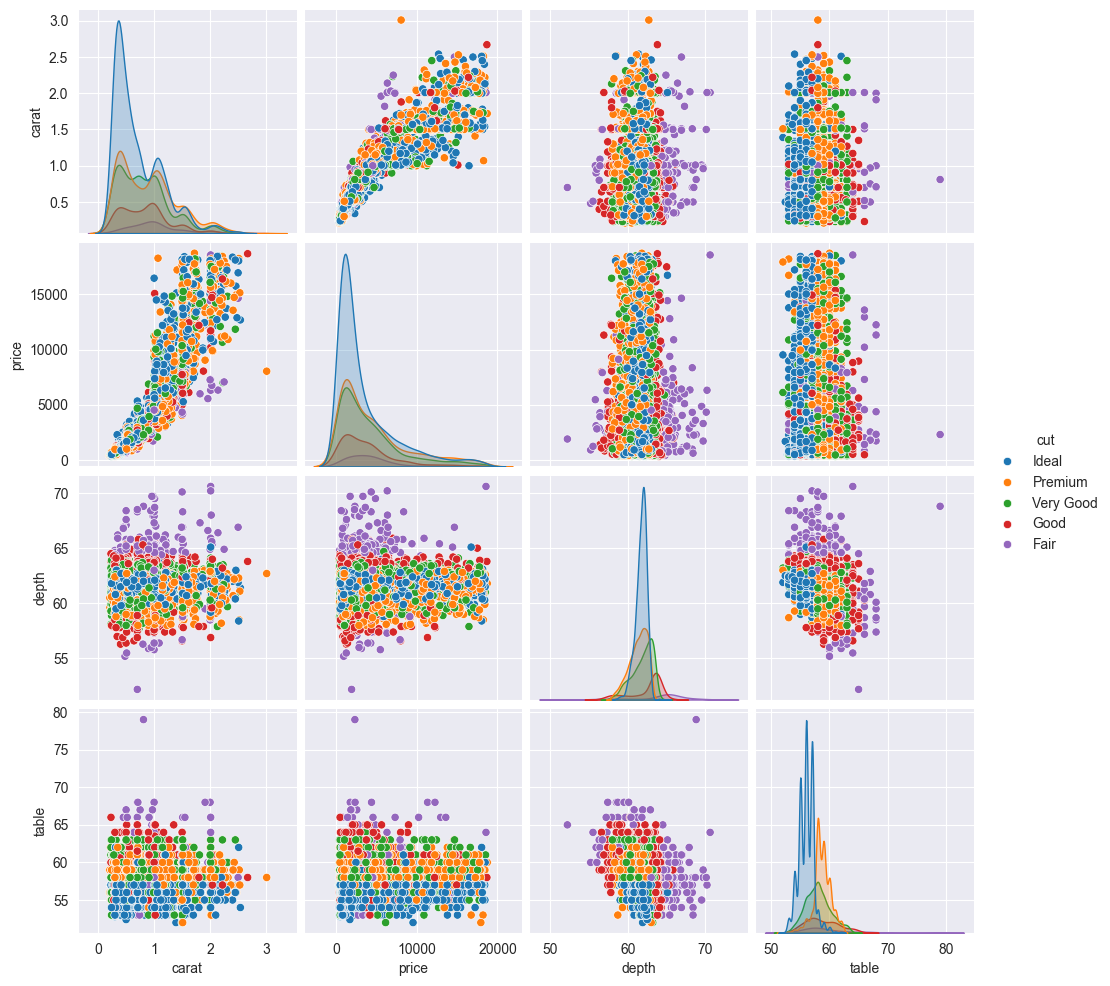

In [79]:
# Выбрал небольшие подмножества данных для скорости отрисовки
sample_diamonds = diamonds.sample(frac=0.1, random_state=1)

# Парные графики
sns.pairplot(sample_diamonds, vars=['carat', 'price', 'depth', 'table'], hue='cut')
plt.show()


Чем выше картаность и размер, тем выше и цена

Text(0.5, 1.0, 'Распределение цены по качеству огранки')

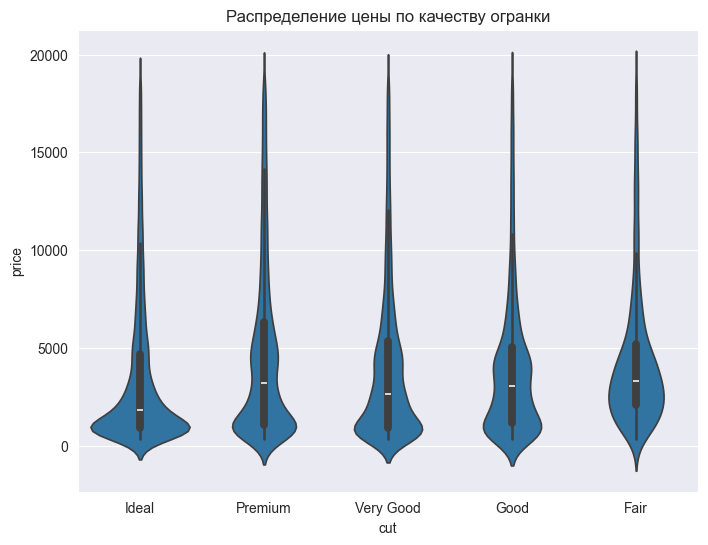

In [80]:
# Распределение цены по качеству огранки
plt.figure(figsize=(8, 6))
sns.violinplot(x='cut', y='price', data=diamonds)
plt.title('Распределение цены по качеству огранки')

Если огранка хорошего качества, то цена может быть выше)))